# My Datastory - Predicting Parkinson's disease using Speech Data



Parkinson's disease (PD) is a progressive, incurable neurodegenerative disorder of the central nervous system that causes partial or full loss in motor reflexes, speech, behavior, mental processing, and other important functions. After Alzheimer's disease, PD is the second most common neurodegenerative disease. In general, PD occurs in one out of every hundred people over 65 years of age. Currently, there are only symptomatic treatments available and monitoring of disease progression requires special testing. The three data sets I will analyse in my Capstone Project were produced in order to determine if PD-associate speech impairments can be used to telediagnose PD or to telemonitor PD progression. PD is associated with speech impairments like dysphonia (defective use of voice), hypophonia (reduced volume), monotone (reduced pitch range), and dysarthia (difficulty with articulation of sounds).  
For the datastory, I am focussing on one data set. The data set consists of 26 voice samples for each of the 20 PD patients and 20 healthy individuals selected for this study. In addition, there is an independent validation data set available from 28 additional PD patients with 6 sound recordings each. From each voice sample 26 different time-frequency-based features were extracted and will be used for the prediction. The main data set also includes the Unified Parkinson's Disease Rating Scale (UPDRS) as a measure of PD progression for each subject.  


## Visualization and analysis based on single sound recordings

First I will explore the main data set based on the individual 26 sound recordings of each subject.

In [1]:
# Load dataset (CSV file) into a Pandas dataframe
import pandas as pd
pd_s1 = pd.read_csv("train_data1.csv",header=False) 

In [2]:
pd_s1.head()

,sample,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d19,d20,d21,d22,d23,d24,d25,d26,udprs,group
0,1_1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1_2,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1_3,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1_4,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1_5,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


Overview on the the time-frequency-based features extracted from the collected voice samples:
Features d1-d5 are frequency parameters based on Jitter, i.e. frequency of voice amplitudes.
Features d6-d11 are amplitude (shimmer) based parameters.
Features d12-d14 are harmonicity parameters and include autocorrelation, noise-to-harmonic and harmonic-to-noise.
Features d15-d19 are parameters describing different elements of pitch.
Features d20-d23 are pulse parameters, while features d24-d26 are voice parameters. 

d1	Jitter (local)  
d2	Jitter (local, absolute)  
d3	Jitter (RAP)  
d4	Jitter (PPQ5)  
d5	Jitter (DDP)  
d6	Shimmer (local)  
d7	Shimmer (local, dB)  
d8	Shimmer (APQ3)  
d9	Shimmer (APQ5)  
d10	Shimmer (APQ11)  
d11	Shimmer (DDA)  
d12	Autocorrelation (AC)  
d13	Noise-To-Harmonic (NTH)  
d14	Harmonic-To-Noise (HTN)  
d15	Median pitch  
d16	Mean pitch  
d17	Pitch standard deviation  
d18	Minimum pitch  
d19	Maximum pitch  
d20	Number of pulses  
d21	Number of periods  
d22	Mean period  
d23	Period standard deviation  
d24	Fraction of locally unvoiced frames  
d25	Number of voice breaks  
d26	Degree of voice breaks  

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# histogram buckets
buckets = 15

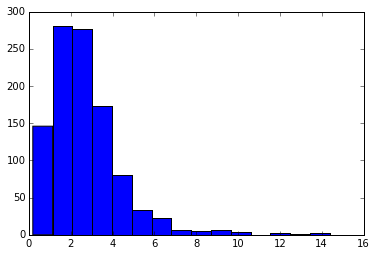

In [5]:
plt.figure()
plt.hist(pd_s1.d1, buckets)
plt.show()

In [7]:
#Identify relationship between variables by calculating correlations between each feature
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
v_f = pd_s1.iloc[0:,1:27]
corr_df = v_f.corr(method="spearman")
print("Correlation matrix")
print(corr_df.head(26))

height has been deprecated.

Correlation matrix
           d1        d2        d3        d4        d5        d6        d7        d8        d9       d10       d11       d12       d13       d14       d15       d16       d17       d18       d19       d20       d21       d22       d23       d24       d25       d26
d1   1.000000  0.889940  0.946344  0.924905  0.946338  0.544712  0.551880  0.491476  0.514330  0.505801  0.491483 -0.718577  0.720482 -0.677573 -0.046446  0.037729  0.387651 -0.162519  0.191052 -0.223167 -0.250024 -0.023610  0.555272  0.481804  0.418010  0.422858
d2   0.889940  1.000000  0.824403  0.819394  0.824429  0.516369  0.505565  0.468352  0.480974  0.493508  0.468363 -0.652035  0.648741 -0.629389 -0.439502 -0.381075  0.130593 -0.486747 -0.166437 -0.429986 -0.446427  0.396293  0.533016  0.405698  0.310373  0.306027
d3   0.946344  0.824403  1.000000  0.949773  0.999999  0.556443  0.564861  0.516614  0.526401  0.505554  0.516622 -0.654195  0.657798 -0.620029 -0.003074  0.066

HEATMAP


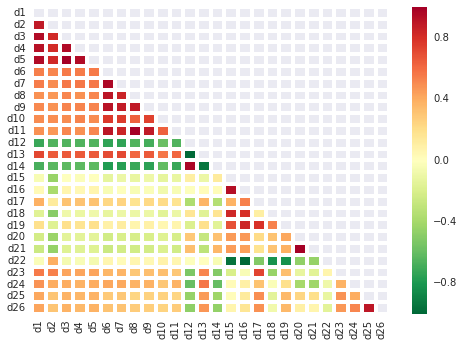

In [8]:
#Create heatmap of correlation values calculated for each pair of features
import seaborn
print("HEATMAP")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

The frequency parameters are highly correlated with each other as well as with d13 (noise-to-harmonic) and moderately correlated with the amplitude parameters (d6 to d11) as well as the voicing parameters d24 to d26 and with the pulse parameter d23 (standard deviation of period). The amplitude parameters d6 to d11 show a similar correlation pattern. The harmonicity parameters autocorrelation (d12) and harmonic-to-noise (d14) show a moderate to strong negative correlation with the frequency, amplitude and voicing parameters as well as with feature d13 (noise-to-harmonic) and d23. In contrast, autocorrelation and harmonic-to-noise values are strongly correlated. This is also the case for the two pitch parameters median and mean pitch, for features d20 (number of pulses) and d21 (number of periods) as well as for the number and degree of voice breaks (d25 and d26, respectively). There is also a high correlation between pitch parameters except between the pitch standard deviation and the minimum pitch. In addition there is a moderate to strong negative correlation between the pitch parameters and the mean period (d22).

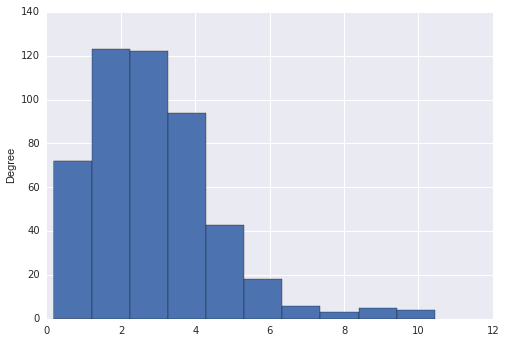

In [9]:
d1 = pd_s1.d1
d1[10:500].plot(kind="hist")
#plt.hist(d2)
